<a href="https://colab.research.google.com/github/rushithakondreddy/haihua_INFO5731_Spring2020/blob/main/In_class_exercise_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The sixth in-class-exercise (20 points in total, 3/2/2021)**

## **1. Rule-based information extraction (10 points)**

Use any keywords related to data science, natural language processing, machine learning to search from google scholar, get the **titles** of 100 articles (either by web scraping or manually) about this topic, define a set of patterns to extract the research questions/problems, methods/algorithms/models, datasets, applications, or any other important information about this topic. 

In [50]:
# Write your code here

from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [51]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [ ]:
headers = [{'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36 Vivaldi/3.3'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36'},
           {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.75 Safari/537.36 Edg/86.0.622.38'}]

pages = np.arange(1, 11) * 10 

responses = []
for page in pages:
    url = 'https://scholar.google.com/scholar?start=' + str(page) + '&q=natural+language+processing&hl=en&as_sdt=0,44'
    print(f'{page} titles being extracted')
    random_index = np.random.randint(0, 4)
    header = headers[random_index]
    response = requests.get(url, headers=header)
    if response.status_code == 200:
        print('Everything is fine. Continue to scrap ...')
    else:
        print('Something went wrong!')
    soup=BeautifulSoup(response.content,'lxml')
    responses.append(soup)



```

10 titles being extracted
Everything is fine. Continue to scrap ...
20 titles being extracted
Everything is fine. Continue to scrap ...
30 titles being extracted
Everything is fine. Continue to scrap ...
40 titles being extracted
Everything is fine. Continue to scrap ...
50 titles being extracted
Everything is fine. Continue to scrap ...
60 titles being extracted
Everything is fine. Continue to scrap ...
70 titles being extracted
Everything is fine. Continue to scrap ...
80 titles being extracted
Everything is fine. Continue to scrap ...
90 titles being extracted
Everything is fine. Continue to scrap ...
100 titles being extracted
Everything is fine. Continue to scrap ...
```



In [55]:
titles = []
count = 1
for response in responses:
    for item in response.select('[data-lid]'):
        try:
            print('-----------' + str(count) + '-----------------------------')
            titles.append(item.select('h3')[0].get_text())
        except Exception as error:
            print('Something went wrong!')
        count += 1



```
-----------1-----------------------------
-----------2-----------------------------
-----------3-----------------------------
-----------4-----------------------------
-----------5-----------------------------
-----------6-----------------------------
-----------7-----------------------------
-----------8-----------------------------
-----------9-----------------------------
-----------10-----------------------------
-----------11-----------------------------
-----------12-----------------------------
-----------13-----------------------------
-----------14-----------------------------
-----------15-----------------------------
-----------16-----------------------------
-----------17-----------------------------
-----------18-----------------------------
-----------19-----------------------------
-----------20-----------------------------
-----------21-----------------------------
-----------22-----------------------------
-----------23-----------------------------
-----------24-----------------------------
-----------25-----------------------------
-----------26-----------------------------
-----------27-----------------------------
-----------28-----------------------------
-----------29-----------------------------
-----------30-----------------------------
-----------31-----------------------------
-----------32-----------------------------
-----------33-----------------------------
-----------34-----------------------------
-----------35-----------------------------
-----------36-----------------------------
-----------37-----------------------------
-----------38-----------------------------
-----------39-----------------------------
-----------40-----------------------------
-----------41-----------------------------
-----------42-----------------------------
-----------43-----------------------------
-----------44-----------------------------
-----------45-----------------------------
-----------46-----------------------------
-----------47-----------------------------
-----------48-----------------------------
-----------49-----------------------------
-----------50-----------------------------
-----------51-----------------------------
-----------52-----------------------------
-----------53-----------------------------
-----------54-----------------------------
-----------55-----------------------------
-----------56-----------------------------
-----------57-----------------------------
-----------58-----------------------------
-----------59-----------------------------
-----------60-----------------------------
-----------61-----------------------------
-----------62-----------------------------
-----------63-----------------------------
-----------64-----------------------------
-----------65-----------------------------
-----------66-----------------------------
-----------67-----------------------------
-----------68-----------------------------
-----------69-----------------------------
-----------70-----------------------------
-----------71-----------------------------
-----------72-----------------------------
-----------73-----------------------------
-----------74-----------------------------
-----------75-----------------------------
-----------76-----------------------------
-----------77-----------------------------
-----------78-----------------------------
-----------79-----------------------------
-----------80-----------------------------
-----------81-----------------------------
-----------82-----------------------------
-----------83-----------------------------
-----------84-----------------------------
-----------85-----------------------------
-----------86-----------------------------
-----------87-----------------------------
-----------88-----------------------------
-----------89-----------------------------
-----------90-----------------------------
-----------91-----------------------------
-----------92-----------------------------
-----------93-----------------------------
-----------94-----------------------------
-----------95-----------------------------
-----------96-----------------------------
-----------97-----------------------------
-----------98-----------------------------
-----------99-----------------------------
-----------100-----------------------------
```



In [ ]:
df = pd.DataFrame({'titles' : titles})
df.head()

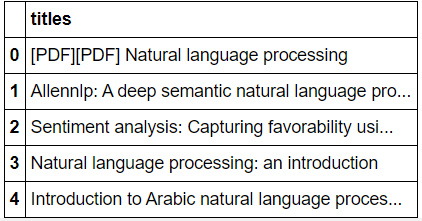

## **2. Domain-specific information extraction (10 points)**

For the legal case used in the data cleaning exercise: [01-05-1 Adams v Tanner.txt](https://raw.githubusercontent.com/unt-iialab/info5731_spring2021/main/class_exercises/01-05-1%20%20Adams%20v%20Tanner.txt), use [legalNLP](https://lexpredict-lexnlp.readthedocs.io/en/latest/modules/extract/extract.html#nlp-based-extraction-methods) to extract the following inforation from the text (if the information is not exist, just print None):

(1) acts, e.g., “section 1 of the Advancing Hope Act, 1986”

(2) amounts, e.g., “ten pounds” or “5.8 megawatts”

(3) citations, e.g., “10 U.S. 100” or “1998 S. Ct. 1”

(4) companies, e.g., “Lexpredict LLC”

(5) conditions, e.g., “subject to …” or “unless and until …”

(6) constraints, e.g., “no more than”

(7) copyright, e.g., “(C) Copyright 2000 Acme”

(8) courts, e.g., “Supreme Court of New York”

(9) CUSIP, e.g., “392690QT3”

(10) dates, e.g., “June 1, 2017” or “2018-01-01”

(11) definitions, e.g., “Term shall mean …”

(12) distances, e.g., “fifteen miles”

(13) durations, e.g., “ten years” or “thirty days”

(14) geographic and geopolitical entities, e.g., “New York” or “Norway”

(15) money and currency usages, e.g., “$5” or “10 Euro”

(16) percents and rates, e.g., “10%” or “50 bps”

(17) PII, e.g., “212-212-2121” or “999-999-9999”

(18) ratios, e.g.,” 3:1” or “four to three”

(19) regulations, e.g., “32 CFR 170”

(20) trademarks, e.g., “MyApp (TM)”

(21) URLs, e.g., “http://acme.com/”

(22) addresses, e.g., “1999 Mount Read Blvd, Rochester, NY, USA, 14615”

(23) persons, e.g., “John Doe

In [9]:
!pip install lexnlp

     |████████████████████████████████| 9.8MB 4.8MB/s 
     |████████████████████████████████| 10.1MB 22.2MB/s 
     |████████████████████████████████| 24.2MB 1.7MB/s 
     |████████████████████████████████| 10.1MB 42.2MB/s 
     |████████████████████████████████| 25.9MB 64.4MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 296kB 42.5MB/s 
     |████████████████████████████████| 358kB 53.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 102kB 9.6MB/s 
     |████████████████████████████████| 6.8MB 34.7MB/s 
     |████████████████████████████████| 1.4MB 39.3MB/s 
     |████████████████████████████████| 14.5MB 337kB/s 
     |████████████████████████████████| 665kB 31.6MB/s 
     |████████████████████████████████| 245kB 29.2MB/s 
     |████████████████████████████████| 133kB 44.8MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=60a88ccf

In [10]:
# write your code here
import lexnlp
import re

In [11]:
with open('01-05-1  Adams v Tanner.txt', 'r', encoding="utf8") as file:
    text = file.read()


In [12]:
text = re.sub(r'\n',' ', str(text))


In [13]:
import lexnlp.extract.en.acts
lexnlp.extract.en.acts.get_act_list(text)

[]

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [20]:
# amounts
import lexnlp.extract.en.amounts
for amount in list(lexnlp.extract.en.amounts.get_amounts(text)):
    print(amount, end=', ')

5.0, 740.0, 1843.0, 2.0, 1.0, 4.0, 2.0, 1821.0, 5.0, 1.0, 1840.0, 3777.0, 80.0, 100.0, 30.0, 1839.0, 741.0, 22.0, 1840.0, 14000.0, 120.0, 1.0, 1840.0, 3.0, 4.0, 1.0, 1.0, 1840.0, 2.0, 1.0, 361.0, 1.0, 307.0, 6.0, 604.0, 1.0, 2.0, 418.0, 422.0, 7.0, 34.0, 41.0, 167.0, 742.0, 3.0, 112.0, 207.0, 3.0, 338.0, 424.0, 5.0, 26.0, 13.0, 235.0, 8.0, 693.0, 4.0, 1821.0, 167.0, 2.0, 2.0, 216.0, 3.0, 66.0, 4.0, 130.0, 29.0, 2.0, 241.0, 2.0, 332.0, 2.0, 422.0, 9.0, 112.0, 743.0, 9.0, 39.0, 14000.0, 1840.0, 744.0, 5.0, 182.0, 3.0, 368.0, 1.0, 397.0, 6.0, 604.0, 1.0, 1821.0, 167.0, 745.0, 4.0, 746.0, 4.0, 210.0, 46.0, 747.0, 5.0, 5.0, 740.0, 1843.0, 284.0, 2019.0, 9.0, 1.0, 55.0, 266.0, 271.0, 1876.0, 2.0, 47.0, 362.0, 376.0, 1872.0, 3.0, 45.0, 329.0, 334.0, 1871.0, 4.0, 31.0, 526.0, 527.0, 1858.0, 5.0, 21.0, 333.0, 335.0, 1852.0, 6.0, 8.0, 145.0, 147.0, 1857.0, 7.0, 65.0, 256.0, 258.0, 3.0, 1880.0, 8.0, 4.0, 913.0, 914.0, 1887.0, 9.0, 103.0, 464.0, 1936.0, 3.0, 1.0, 9.0, 39.0, 1828.0, 2.0, 2.0, 5.0, 

In [21]:

import lexnlp.extract.en.citations
_ = [print(citation) for citation in list(lexnlp.extract.en.citations.get_citations(text))]

(5, 'Ala.', 'Alabama Reports', 740, None, None, None)
(5, 'Ala.', 'Alabama Reports', 740, '1843', None, None)
(55, 'Ala.', 'Alabama Reports', 266, '271', None, None)
(47, 'Ala.', 'Alabama Reports', 362, '376', None, None)
(45, 'Ala.', 'Alabama Reports', 329, '334', None, None)
(31, 'Ala.', 'Alabama Reports', 526, '527', None, None)
(21, 'Ala.', 'Alabama Reports', 333, '335', None, None)
(8, 'Cal.', 'California Reports', 145, '147', None, None)
(65, 'Ala.', 'Alabama Reports', 256, '258', None, None)
(4, 'S.W.', 'South Western Reporter', 913, '914', None, None)
(103, 'A.L.R.', 'American Law Reports', 464, None, None, None)
(9, 'Cow.', "Cowen's Reports", 39, None, None, None)
(5, 'Port.', 'Alabama Reports, Porter', 182, None, None, None)
(9, 'Johns.', "Johnson's Reports", 108, None, None, None)


In [22]:
import lexnlp.extract.en.entities.nltk_re
_ = [print(company) for company in list(lexnlp.extract.en.entities.nltk_re.get_companies(text))]

Lehman, Durr Co, (17983, 18001)


In [23]:
import lexnlp.extract.en.conditions
_ = [print(condition) for condition in list(lexnlp.extract.en.conditions.get_conditions(text))]

('until', '4 Cases that cite this headnote  [2] Creditors’ Remedies Lien and Priority Under St.1821, prohibiting a levy on a crop', '')
('until', 'on a growing crop, nor does such lien attach', '')
('if', 'It was proved by the claimants, by the production of a written contract, that Harrison, on the twenty-second of May, 1840, in consideration that the claimants were involved, as indorsers for Burton & Harrison of Sumter county, and were then exposed to an execution, amounting to upwards of fourteen thousand dollars, bargained and sold to the claimants all his growing crop of cotton &c., consisting of one hundred and twenty acres, &c. Allen Harrison promised and obliged himself to give up his crop to the use of the claimants at any time to save them from suffering as his indorsers;', '')
('when', 'The claimants came from Tennessee, (where they resided) about the first of September, 1840, bringing with them three or four white laborers, and took possession of the crop and slaves, and wi

In [24]:
import lexnlp.extract.en.constraints
_ = [print(constraint) for constraint in list(lexnlp.extract.en.constraints.get_constraints(text))]

('after', 'on a growing crop, nor does such lien attach until', '')
('after', '', ' and that alias and pluries fieri facias’, issued regularly up to the time levy was made; that the cotton levied on was growed on the plantation of harrison, and cultivated by the hands in his service.')
('first of', 'the claimants came from tennessee, (where they resided) about the', '')
('first of', 'the court charged the jury, that the plaintiff had no lien by virtue of his judgment, and execution on the growing crop; that harrison had a right to convey it, without being in any manner restrained by them; that the writing adduced, was a sale of the crop, but if it was not, and the lien of the fieri facias would have attached upon it, when gathered, yet if the claimants obtained possession on the', '')
('after', 'it merely inhibits the levy, but the lien attaches, and a levy and sale may be made', '')
('more than', 'taking this to be clear *744 law, and it will be seen, that the defendant in execution a

In [25]:

# copyrights
import lexnlp.extract.en.copyright
_ = [print(copyright) for copyright in list(lexnlp.extract.en.copyright.get_copyright(text))]

('©', '2019', 'Thomson Reuters. No')


In [ ]:
from lexnlp.extract.en.dict_entities import entity_config


In [ ]:
import pandas
import lexnlp.extract.en.dict_entities
court_df = pandas.read_csv("https://raw.githubusercontent.com/LexPredict/lexpredict-legal-dictionary/1.0.5/en/legal/us_courts.csv")
# Create config objects
court_config_data = []
for _, row in court_df.iterrows():
    c = (row["Court ID"], row["Court Name"], 0, row["Alias"].split(";") if not pandas.isnull(row["Alias"]) else [])
    court_config_data.append(c)
for entity, alias in lexnlp.extract.en.courts.get_courts(text, court_config_data):
    print("entity=", entity)
    print("alias=", alias)
entity= (98, 'Eastern District of Virginia', 0, [('Eastern District of Virginia', None, False, None), ('E.D. Va.', None, False, None)])
alias= ('E.D. Va.', None, False, None)
entity= (70, 'Southern District of New York', 0, [('Southern District of New York', None, False, None), ('S.D.N.Y.', None, False, None)])
alias= ('S.D.N.Y.', None, False, None)

In [36]:
import lexnlp.extract.en.cusip
list(lexnlp.extract.en.cusip.get_cusip(text))

[]

In [37]:
import lexnlp.extract.en.dates
_ = [print(date) for date in list(lexnlp.extract.en.dates.get_dates(text))]

2021-06-01
1840-11-01
1839-10-01
1840-09-01
1840-05-01
1840-05-01
2021-12-01
2021-12-01
2021-01-01
2021-01-01
2021-01-01
2021-03-21
2021-06-01
2021-07-01
2021-11-01


In [38]:
import lexnlp.extract.en.definitions
list(lexnlp.extract.en.definitions.get_definitions(text))

[]

In [39]:
import lexnlp.extract.en.distances
list(lexnlp.extract.en.distances.get_distances(text))

[]

In [41]:

#durations
import lexnlp.extract.en.durations
list(lexnlp.extract.en.durations.get_durations(text))

[('second', Decimal('20.0'), Decimal('0.0002')),
 ('year', Decimal('6.0'), Decimal('2190.0'))]

In [ ]:
import lexnlp.extract.en.geoentities
lexnlp.extract.en.geoentities.get_geoentities(text)

In [43]:
import lexnlp.extract.en.money
list(lexnlp.extract.en.money.get_money(text))

[(Decimal('100.0'), 'USD'),
 (Decimal('14000.0'), 'USD'),
 (Decimal('14000.0'), 'USD')]

In [44]:
import lexnlp.extract.en.percents
list(lexnlp.extract.en.percents.get_percents(text))

[]

In [45]:
import lexnlp.extract.en.pii
list(lexnlp.extract.en.pii.get_pii(text))

[]

In [46]:
import lexnlp.extract.en.ratios
list(lexnlp.extract.en.ratios.get_ratios(text))

[]

In [47]:
import lexnlp.extract.en.regulations
list(lexnlp.extract.en.regulations.get_regulations(text))

[]

In [48]:
import lexnlp.extract.en.trademarks
list(lexnlp.extract.en.trademarks.get_trademarks(text))

[]

In [49]:
import lexnlp.extract.en.urls
list(lexnlp.extract.en.urls.get_urls(text))

[]